## Homework 6 : Bert Zhao
===

**<span style="color: darkgreen">Due Friday May 8 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

Read up on steady state error and performance in Nise for more background.

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1, len(matrices), figsize=(5*len(matrices)+1,5),squeeze=False)
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    for i,[matrix,title] in enumerate(zip(matrices,titles)):
        a = np.array(matrix).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2
        x2dot = a[1,0]*x1 + a[1,1]*x2
        if np.max(np.abs(np.array([x1dot,x2dot]).flatten()))==0:
          scale = 1
        else:
          scale = None
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r',headlength=4,headaxislength=4,scale=scale)
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(title)
    return None

def find_Gs(A, B, C, D):

  s = symbols('s')
  II = eye(A.shape[0])
  Gs = C * (s * II - A).pinv() * B + D
  return simplify(Gs)

try: 
  import google.colab #test for colab
  import IPython
  def setup_typeset():
    """MathJax initialization for the current cell.
    
    This installs and configures MathJax for the current output.
    """
    IPython.display.display(IPython.display.HTML('''
        <script src="https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=TeX-AMS_HTML-full,Safe&delayStartupUntil=configured"></script>
        <script>
          (() => {
            const mathjax = window.MathJax;
            mathjax.Hub.Config({
            'tex2jax': {
              'inlineMath': [['$', '$'], ['\\(', '\\)']],
              'displayMath': [['$$', '$$'], ['\\[', '\\]']],
              'processEscapes': true,
              'processEnvironments': true,
              'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
              'displayAlign': 'center',
            },
            'HTML-CSS': {
              'styles': {'.MathJax_Display': {'margin': 0}},
              'linebreaks': {'automatic': true},
              // Disable to prevent OTF font loading, which aren't part of our
              // distribution.
              'imageFont': null,
            },
            'messageStyle': 'none'
          });
          mathjax.Hub.Configured();
        })();
        </script>
        '''))
  def custom_latex_printer(exp,**options):
      setup_typeset()
      return printing.latex(exp,**options)
  init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
except:
  init_printing(use_latex='mathjax')

# 1. Linearity of systems with multiple inputs
In the last assignment we took for granted that we could analyze the systems response from $R$ to $Y$, $N$ to $Y$ and $D$ to $Y$ separately.

For the standard system show in the disturbance/noise notes (reproduced below), Show that the systems output due to $R$ $N$, and $D$ together is equal to the sum of the three input/output transfer functions multiplied by their respective their inputs.  i.e. show that $Y$ in terms of $R$, $N$, and $D$ is equal to $\frac{Y}{R}R+\frac{Y}{D}D+\frac{Y}{N}N$.

<img width=57.5% src="https://github.com/christakahashi/ECE447/blob/master/images/blocks-with-dist-and-noise.png?raw=1">


First lets determine the complete system response based on the following labels.
![alt text](https://docs.google.com/drawings/d/e/2PACX-1vS_ynwpJqvgUvmM75V-Fey0JDyogSGSvX-jdLExIx8Im2A-sueAixyw7Cu09RwT_bj4nqsx601AtAF5/pub?w=960&h=720)

$$\begin{align}
  & a = Y(s)H_1(s) \\
  & b = a + N(s) = Y(s)H_1(s) + N(s) \\
  & c = bH_2(s) = (Y(s)H_1(s) + N(s))H_2(s) \\
  & E(s) = R(s) - c = E(s) = R(s) - (Y(s)H_1(s) + N(s))H_2(s) \\
  & d = E(s)G_c(s) = (R(s) - (Y(s)H_1(s) + N(s))H_2(s))G_c(s) \\
  & e = d + D(s) = ((R(s) - (Y(s)H_1(s) + N(s))H_2(s))G_c(s)) + D(s) \\
  & Y(s) = eG(s) = (((R(s) - (Y(s)H_1(s) + N(s))H_2(s))G_c(s)) + D(s))G(s) \\
\end{align}$$

$Y(s)$ can then be simplified to get the system function.

$$ Y(s) = (((R(s) - (Y(s)H_1(s) + N(s))H_2(s))G_c(s)) + D(s))G(s) $$

$$ Y(s) = R(s)G_c(s)G(s) - Y(s)H_1(s)H_2(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s) + D(s)G(s) $$

$$ Y(s) + Y(s)H_1(s)H_2(s)G_c(s)G(s) = R(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s) + D(s)G(s) $$

$$ Y(s)(1 + H_1(s)H_2(s)G_c(s)G(s)) = R(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s) + D(s)G(s) $$

$$ Y(s)(1 + H_1(s)H_2(s)G_c(s)G(s)) = R(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s) + D(s)G(s) $$

$$ Y(s) = \frac{R(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s) + D(s)G(s)}{1 + H_1(s)H_2(s)G_c(s)G(s)} $$

Then find the transfer function for each isolated output. First, $\frac{Y(s)}{R(s)}$:

$$Y(s) = (R(s)-Y(s)H_1(s)H_2(s))G_c(s)G(s)$$

$$Y(s) = R(s)G_c(s)G(s)-Y(s)H_1(s)H_2(s)G_c(s)G(s)$$

$$Y(s)+Y(s)H_1(s)H_2(s)G_c(s)G(s) = R(s)G_c(s)G(s)$$

$$Y(s)(1+H_1(s)H_2(s)G_c(s)G(s)) = R(s)G_c(s)G(s)$$

$$\frac{Y(s)}{R(s)} = \frac{G_c(s)G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)}$$

Second, $\frac{Y(s)}{N(s)}$:

$$Y(s) = -(Y(s)H_1(s) + N(s))H_2(s)G_c(s)G(s)$$

$$Y(s) = -Y(s)H_1(s)H_2(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s)$$

$$Y(s)+Y(s)H_1(s)H_2(s)G_c(s)G(s) =  -N(s)H_2(s)G_c(s)G(s)$$

$$Y(s)(1+H_1(s)H_2(s)G_c(s)G(s)) =  -N(s)H_2(s)G_c(s)G(s)$$

$$\frac{Y(s)}{N(s)} =  \frac{-H_2(s)G_c(s)G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)}$$

Third, $\frac{Y(s)}{D(s)}$:

$$Y(s) = (-Y(s)H_1(s)H_2(s)G_c(s) + D(s))G(s)$$

$$Y(s) = -Y(s)H_1(s)H_2(s)G_c(s)G(s) + D(s)G(s)$$

$$Y(s)+Y(s)H_1(s)H_2(s)G_c(s)G(s) = D(s)G(s)$$

$$Y(s)(1+H_1(s)H_2(s)G_c(s)G(s)) = D(s)G(s)$$

$$\frac{Y(s)}{D(s)} = \frac{G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)}$$

When we calculate $\frac{Y(s)}{R(s)}R(s) + \frac{Y(s)}{N(s)}N(s) + \frac{Y(s)}{D(s)}D(s)$, we get:

$$\frac{G_c(s)G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)}R(s) + \frac{-H_2(s)G_c(s)G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)}N(s) +  \frac{G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)}D(s)$$

Which is equal to the original expression:

$$ \frac{R(s)G_c(s)G(s) - N(s)H_2(s)G_c(s)G(s) + D(s)G(s)}{1 + H_1(s)H_2(s)G_c(s)G(s)} $$

# 2. Full system stability.
For the standard disturbance/noise block diagram from notes and reprinted in 1.:

Find a $Gc$, $G$, $H1$, $H2$, so that $Y/R$ is **stable** but either $Y/D$ or $Y/N$ is **unstable**.  No block may be 0 (otherwise it's not a feedback system).  

(HINT1: examine the the three IO transfer functions in terms of $Gc$, $G$, $H1$, $H2$ first to plan out your approach.  remember each one is a fraction of polynomials in $s$.)

(HINT2: Remember when analyzing system transfer functions, you set all other inputs to 0.)

(HINT3: You can let some of the blocks = 1 if it makes algebra easier.)

(HINT4: What if $G_c G$ has pole-zero cancelation?)




Let us analyze the system by picking fractions of polynomials in terms of arbitrary constants $a$, $b$, and $c$, where they will represent poles and zeros in the system.

##Step 1
Firstly, we can assume the following for $G(s)$, $G_c(s)$, $H_1(s)
$, and $H_2(s)$:

$$G(s) = \frac{1}{(s+a)(s+b)}$$

$$G_c(s) = \frac{s+a}{s+c}$$

$$H_1(s) = 1$$

$$H_2(s) = s+b$$

$G(s)$ and $G_c(s)$ are picked as such so that they will have pole zero cancelation with $s+a$. $G(s)$ is also picked with two poles because in the transfer function, $\frac{Y(s)}{D(s)}$, $G(s)$ is the only term in the numerator so having two poles for $G(s)$ will allow us to isolate $\frac{Y(s)}{D(s)}$ as the transfer function with its own unique poles, which will allow us to select an $a$, $b$, and $c$ that causes $\frac{Y(s)}{D(s)}$ to be unstable.

##Step 2
Next, we solve for all three transfer functions and substitute the values of $G(s)$, $G_c(s)$, $H_1(s)$, and $H_2(s)$.

Transfer function $\frac{Y(s)}{R(s)}$:

$$\begin{align}
  & = \frac{G_c(s)G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)} \\
  & = \frac{\frac{s+a}{s+c} \frac{1}{(s+a)(s+b)}}{1+(s+b)\frac{s+a}{s+c} \frac{1}{(s+a)(s+b)}} \\
  & = \frac{\frac{1}{(s+c)(s+b)}}{1+ \frac{1}{s+c}} \\
  & = \frac{\frac{1}{(s+c)(s+b)}}{\frac{s+c+1}{s+c}} \\
  & = \frac{1}{(s+b)(s+c+1)}
\end{align}$$

Transfer function $\frac{Y(s)}{N(s)}$:

$$\begin{align}
  & = \frac{-H_2(s)G_c(s)G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)} \\
  & = \frac{-(s+b)\frac{s+a}{s+c} \frac{1}{(s+a)(s+b)}}{1+(s+b)\frac{s+a}{s+c} \frac{1}{(s+a)(s+b)}} \\
  & = \frac{-\frac{1}{(s+c)}}{1+ \frac{1}{s+c}} \\
  & = \frac{-\frac{1}{(s+c)}}{\frac{s+c+1}{s+c}} \\
  & = \frac{-1}{s+c+1}
\end{align}$$

Transfer function $\frac{Y(s)}{D(s)}$:

$$\begin{align}
  & = \frac{G(s)}{1+H_1(s)H_2(s)G_c(s)G(s)} \\
  & = \frac{\frac{1}{(s+a)(s+b)}}{1+(s+b)\frac{s+a}{s+c} \frac{1}{(s+a)(s+b)}} \\
  & = \frac{\frac{1}{(s+a)(s+b)}}{1+ \frac{1}{s+c}} \\
  & = \frac{\frac{1}{(s+a)(s+b)}}{\frac{s+c+1}{s+c}} \\
  & = \frac{s+c}{(s+a)(s+b)(s+c+1)}
\end{align}$$

Now we have all three of the transfer functions in terms of $a$, $b$, and $c$.

$$\begin{align}
  & \frac{Y(s)}{R(s)} = \frac{1}{(s+b)(s+c+1)} \\
  & \frac{Y(s)}{N(s)} = \frac{-1}{s+c+1} \\
  & \frac{Y(s)}{D(s)} = \frac{s+c}{(s+a)(s+b)(s+c+1)} \\
\end{align}$$

##Step 3

Now that we can see that $\frac{Y(s)}{D(s)}$ has a unique pole from $s+a$, we can select values of $a$, $b$, and $c$ that cause $\frac{Y(s)}{R(s)}$ and $\frac{Y(s)}{N(s)}$ to be stable, but $\frac{Y(s)}{D(s)}$ to be unstable.

For example, if $a=-1$, $b=1$, and $c=2$, then we get the following three transfer functions:

$$\begin{align}
  & \frac{Y(s)}{R(s)} = \frac{1}{(s+1)(s+3)} \\
  & \frac{Y(s)}{N(s)} = \frac{-1}{s+3} \\
  & \frac{Y(s)}{D(s)} = \frac{s+2}{(s-1)(s+1)(s+3)} \\
\end{align}$$

Both $\frac{Y(s)}{R(s)}$ and $\frac{Y(s)}{N(s)}$ have only negative real poles while $\frac{Y(s)}{D(s)}$ has a positive real pole at $1$, making it unstable.

#  3. Performance with a zero

Show that any transfer function $G(s)$ with two complex poles ard one zero can be written in the form

$$
s T(s) + a T(s)
$$

where $T(s)$ is the archetypal 2nd order system discussed in the notes on Second Order systems.

a) Using the step response of $T(s)$ and its derivative, write down
  the step response of $G(s)$.

b) Determine a state space representation of $G(s)$ using the same
  $A$ matrix we used in the notebook second order systems reproduced here for convenience

$$
A=\begin{pmatrix} 
-\omega \zeta & -\beta \omega\\
\beta \omega & -\omega \zeta\\
\end{pmatrix}
$$

  Show that your state representation
  gives you the right transfer function (note: this subproblem is just a curiosity and does
  not help with the next two parts).

(Put another way: Given $A$ above, find $B$,$C$ so that the system ($A$,$B$,$C$) has transfer function $G(s)$) 

c) Find expressions for the peak time and percent overshoot for
  $G(s)$ given a step input.  Compare these to the peak time and
  percent overshoot for $T(s)$.

d) 
   
i) Plot the step response of the transfer function
$$
\frac{s+2}{s^2+s+1}
$$
and plot the response of $T(s)$ on the same axis and point out the
differences predicted by your analysis.


##a)

Given the system:

$$T(s) = \frac{\omega^2}{s^2 + 2 \zeta \omega s + \omega^2}$$

We can calculate $G(s)$ to be:

$$ G(s) = s \cdot \frac{\omega^2}{s^2 + 2 \zeta \omega s + \omega^2} + a \cdot \frac{\omega^2}{s^2 + 2 \zeta \omega s + \omega^2}$$

$$G(s) = \frac{(s+a)\omega^2}{s^2 + 2 \zeta \omega s + \omega^2}$$

Where $-a$ is the single zero of the system.

##b)

Given that the denominator of $G(s)$ is the same as $T(s)$, we know that matrices $A$ and $B$ are the same as the archetypal second order form, which are:

$$
A=\begin{pmatrix} 
-\omega \zeta & -\beta \omega\\
\beta \omega & -\omega \zeta\\
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
  \omega \\
  0
\end{pmatrix}
$$

Using sympy, we can solve for matrix $C$ by first letting $C = \begin{pmatrix}c_1 & c_2\end{pmatrix}$ and using the expression $G(s) = C(sI-A)^{-1}B$ to get:

$$G(s) = \left[\begin{matrix}\frac{\omega \left(\beta c_{2} \omega + c_{1} \left(s + \omega \zeta\right)\right)}{s^2 + 2 \zeta \omega s + \omega^2}\end{matrix}\right]$$

Since we know the numerator of $G(s)$, we can pick values of $c_1$ and $c_2$ such that:

$$\omega (\beta c_{2} \omega + c_{1} (s + \omega \zeta)) = (s+a)\omega^2$$

This equality is satisfied if:

$$c_1 = 0$$

$$c_2 = \frac{s+a}{\beta}$$

Which gives us matrix $C$:

$$
C = \begin{pmatrix} 0 & \frac{s+a}{\beta}\end{pmatrix}
$$

Therefore, the matrices representing the state space are:

$$
A=\begin{pmatrix} 
-\omega \zeta & -\beta \omega\\
\beta \omega & -\omega \zeta\\
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
  \omega \\
  0
\end{pmatrix}
$$

$$
C = \begin{pmatrix} 0 & \frac{s+a}{\beta}\end{pmatrix}
$$

In [83]:
var("s")
var("w z t b tau theta", real=True, positive=True)
var("c1 c2")
var("a")

A = Matrix([
    [-w*z, -w*b],
    [w*b,-w*z]
])
B=Matrix([
    [w],
    [0]
])
Csolve=Matrix([[c1, c2]])
Ctest=Matrix([[0, (s+a)/b]])

Gsolve = Csolve*(s*eye(2)-A).inv()*B
Gtest = Ctest*(s*eye(2)-A).inv()*B

Gsolve.simplify()
Gtest.simplify()

display(Gsolve)
display(Gtest)

⎡w⋅(b⋅c₂⋅w + c₁⋅(s + w⋅z))⎤
⎢─────────────────────────⎥
⎢     2  2            2   ⎥
⎣    b ⋅w  + (s + w⋅z)    ⎦

⎡     2            ⎤
⎢    w ⋅(a + s)    ⎥
⎢──────────────────⎥
⎢ 2  2            2⎥
⎣b ⋅w  + (s + w⋅z) ⎦

##c)

When solving for peak time and percent overshoot, we first need to get $y_G(t)$, which can be achieved with the inverse Laplace Transform of $G(s)$.

$$y_G(t) = ay(t) + \dot y(t)$$

The peak time can be found at the maximum value of $y_G(t)$, which can be found with:

$$\dot y_G(t) = a \dot y(t) + \ddot y(t) = 0$$

Given the second order form of $y(t)$.

$$ 
y(t) = 1 - \frac{1}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t + \theta)
$$

$$
\dot y(t) = \frac{\omega}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t)
$$

$$
\ddot y(t) = \omega^2e^{-\zeta \omega t}\cos(\omega \beta t) - 
\frac{\omega^2 \zeta e^{-\zeta \omega t}\sin(\omega \beta t)}{\beta}
$$

This give us the following expression for $y_G(t)$:

$$\dot y_G(t) = a\frac{\omega}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t) + \omega^2e^{-\zeta \omega t}\cos(\omega \beta t) - 
\frac{\omega^2 \zeta e^{-\zeta \omega t}\sin(\omega \beta t)}{\beta} = 0
$$

Solving for $t$, we get:

$$
a\frac{\omega}{\beta} e^{-\zeta \omega t} \sin(\omega \beta t) = -\omega^2e^{-\zeta \omega t}\cos(\omega \beta t) + 
\frac{\omega^2 \zeta e^{-\zeta \omega t}\sin(\omega \beta t)}{\beta}
$$

$$
\frac{a}{\beta}  \sin(\omega \beta t) = -\omega\cos(\omega \beta t) + \frac{\omega \zeta \sin(\omega \beta t)}{\beta}
$$

$$
\frac{a-\zeta\omega}{\beta}  \sin(\omega \beta t) = -\omega\cos(\omega \beta t)
$$

$$
\frac{\beta\omega}{\zeta\omega-a} = \tan(\omega \beta t)
$$

$$
t = \frac{\arctan(\frac{\beta\omega}{\zeta\omega-a}) + n\pi}{\beta\omega}
$$

Where $n = 1$ to ensure that the time is a positive value.

We can then plug this time value back into $y_G(t)$ to get the percent overshoot from the maximum response.

If we let:

$$
t = \frac{\arctan(\frac{\beta\omega}{\zeta\omega-a}) + n\pi}{\beta\omega}
$$

$$ f = \arctan(\frac{\beta\omega}{\zeta\omega-a})$$

$$ q = -\zeta \omega t$$

Then we can find a simplified expression of the maximum response to be:

$$M_p = a[1+\frac{1}{\beta}e^q\sin(f+\theta)] - [\frac{\omega}{\beta}e^q\sin(f)]$$

We can then find the percent overshoot using the following equation:

$$ \text{P.O.} = \frac{M_p - y_{ss}}{y_{ss}}$$

Substituting with our values gives:

$$ \text{P.O.} = \frac{a[1+\frac{1}{\beta}e^q\sin(f+\theta)] - [\frac{\omega}{\beta}e^q\sin(f)] - a}{a}$$

We can see that the system $G(s)$ has a shorter peak time and greater percent overshoot.

##d) 

We can plot the transfer function $G(s) = \frac{s+2}{s^2+s+1}$ and $T(s)$ by finding the values of $\zeta$ and $\omega$.

By inpection, we get that $\zeta = 0.5$ and $\omega = 1$ which makes $T(s) = \frac{1}{s^2+s+1}$. Both systems are plotted below.

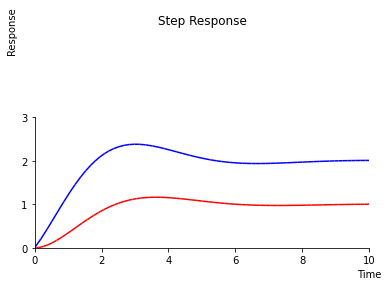

In [84]:
var("t", real=True,positive=True)
var("s")

G = (s + 2) / (s**2 + s + 1)
T = 1 / (s**2 + s + 1)

YG = (1/s) * G
YG = YG.cancel()

YT = (1/s) * T
YT = YT.cancel()

yG = inverse_laplace_transform(YG, s, t)
yT = inverse_laplace_transform(YT, s, t)

plots = plotting.plot(yG, yT, (t,0,10),ylim=(0,5), title='Step Response', xlabel='Time', ylabel='Response', show=False)
plots[0].line_color = 'blue' #g(t)
plots[1].line_color = 'red' #y(t)
plots.show()


In [0]:
#test = solve()

# 4. Controller Design

Consider the transfer function 

$$
G(s) = \frac{10}{s+1}.
$$

Find a negative feedback controller with at least two tunable gains
that (1) results in zero steady state error when the input is a unit step (1/s). (and show why it works);
(2) Gives a settling time of 4 seconds; (3) has 10% overshoot. Use
the standard 2nd order approximation. Plot the step response of the
system and compare the standard approximation with the plot.

When implementing a controller for zero steady state error, we should choose a PI controller for the sake of convenience. This give us the following for our $G_c(s)$:

$$G_c(s) = K_p+\frac{K_i}{s}$$

This gives us the following transfer function:

$$T(s) = \frac{G_c(s)G(s)}{1+G_c(s)G(s)}$$

This gives the following characteristic equation for the system:

$$1+G_c(s)G(s) = 1 + (K_p+\frac{K_i}{s}) (\frac{10}{s+1}) = 0$$

We can then reorganize the characteristic equation into the form of the archetypal second order control system.

$$1 + (K_p+\frac{K_i}{s}) (\frac{10}{s+1}) = 0$$

$$s(s+1) + (K_ps+K_i)10 = 0$$

$$s^2+(10K_p+1)s + 10K_i = 0$$

We then need to determine $K_p$ and $K_i$ using the conditions of the given system. We first need to find $\zeta$ and $\omega$ for the characteristic equation for a second order system.

$$ \text{% overshoot} = e^{-\frac{\zeta \pi}{\sqrt{1-\zeta^2}}} = 0.1$$

$$ \frac{\zeta \pi}{\sqrt{1-\zeta^2}} = -\ln({0.1})$$

$$ \zeta = \sqrt{\frac{\ln(0.1)^2}{\pi^2+\ln(0.1)^2}} \approx 0.5912$$

$$\frac{4}{\omega \zeta} = 4$$

$$\omega = \frac{1}{\zeta} \approx 1.6916$$

We can then substitute into the second order characteristic equation to find values for $K_p$ and $K_i$.

$$ s^2 + 2 \zeta \omega s + \omega^2 = s^2 + 2s + 2.8615= 0$$

Comparing to the characteristic equation we previously solved, we can see that:

$$10K_p + 1 = 2$$
$$K_p = 0.1$$

And

$$10K_i = 2.8615$$
$$K_i = 0.28615$$

We can then plug these values to get the complete transfer function along with a step input for plotting.

$$\frac{1}{s} T(s) = \frac{1}{s} \frac{(0.1+\frac{0.28615}{s})(\frac{10}{s+1})}{s^2 + 2s + 2.8615}$$

Note that due to limitations with Sympy inverse_laplace_transform and irrational numbers, $K_i$ was approximated with $0.3$.

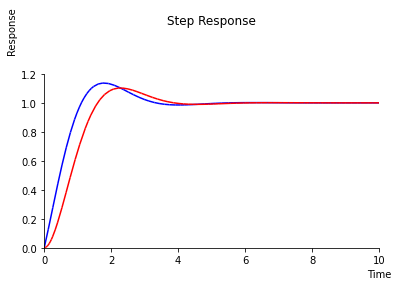

In [86]:
var("t", real=True,positive=True)
var("s")

G = 10 / (s + 1)
Gc = 0.1 + (0.3 / s)

T = (1/s) * (G * Gc) / (1 + G * Gc)
T = T.cancel()


S = (1/s) * (2.9) / (s**2 + 2*s + 2.9) 
S = S.cancel()

y = inverse_laplace_transform(T, s, t)
s = inverse_laplace_transform(S, s, t)

plots = plotting.plot(y,s,(t,0,10),ylim=(0,1.5), title='Step Response', xlabel='Time', ylabel='Response', show=False)
plots[0].line_color = 'blue' #modified controller
plots[1].line_color = 'red' #standard
plots.show()

# 5. Sensitivity Revisited

In many systems overshoot can cause critical failure.  For example temperature overshoot may cause a component to fail, position overshoot may cause objects to collide, etc. 


Determine a formula for the
sensitivity of the percent overshoot of the controlled system to each
of the gains in your controller for problem (4). To which gain is the
system more sensitive? Repeat for the sensitivity of the settling
time. Plot these sensitivities in two plots. First, plot the sensitivity of P.O. to 
gain one. Overlay several plots of that sensitivity, each one for a different value of gain two. 
Second, make a similar plot of the sensitivity of P.O. to gain two.

Given our system from problem 4, the overall transfer function of the system with a PI controller is represented with:

$$ \frac{(K_p+\frac{K_i}{s}) (\frac{10}{s+1})}{s^2+(10K_p+1)s + 10K_i}$$

Using the approximation from problem 3 and the design example from the performance lecture notes, we can approximate the transfer function using the following format.

$$T(s) = \frac{K}{s^2 + as + K}$$

And by coefficient matching, we can find that:

$$\omega = \sqrt{10k_i} $$

$$\zeta = \frac{10K_p+1}{2\sqrt{10K_i}}$$

This gives us the follwing expressions for percent overshoot and settling time.

$$\text{P.O.} = e^{\frac{-\frac{10K_p+1}{2\sqrt{10K_i}} \pi}{\sqrt{1-(\frac{10K_p+1}{2\sqrt{10K_i}})^2}}}$$

$$T_s = \frac{8}{10K_p + 1}$$

Then we can solve for sensitivity of percent overshoot as a function of the gains $K_i$ and $K_p$.

$$S^{PO}_{K_i} = \frac{\partial \text{P.O.}}{K_i} \cdot \frac{K_i}{\text{P.O.}} =  \frac{20 \pi K_{i}^{\frac{3}{2}} \sqrt{\frac{1}{K_{i}} \left(40 K_{i} - \left(10 K_{p} + 1\right)^{2}\right)}}{\left(40 K_{i} - \left(10 K_{p} + 1\right)^{2}\right)^{2}} \left(10 K_{p} + 1\right)$$

$$S^{PO}_{K_p} = \frac{\partial \text{P.O.}}{K_p} \cdot \frac{K_p}{\text{P.O.}} =  - \frac{400 \pi K_{i}^{\frac{3}{2}} K_{p} \sqrt{40 - \frac{1}{K_{i}} \left(10 K_{p} + 1\right)^{2}}}{\left(40 K_{i} - \left(10 K_{p} + 1\right)^{2}\right)^{2}}$$

We can also solve for sensitivity of settling time as a funcion of just $K_p$.

$$S^{T_s}_{K_p} = \frac{\partial T_s}{K_p} \cdot \frac{K_p}{T_s} = -\frac{10K_p}{10K_p+1}$$

We can see by inspection that the sensitivity of settling time to $K_i$ equals zero because it is not a function of $K_i$ at all.

All four functions are plotted below with the exception of $S^{T_s}_{K_i}$ which is a zero plot. We can see from the plots that the system is much more sensitive to $K_p$ than $K_i$.



In [87]:
var("K_i K_p")

SPOki = exp(-(pi*(10*K_p+1))/(2*sqrt(10)*sqrt(1-(10*K_p+1)**2/(40*K_i))*sqrt(K_i)))

SPOki1 = SPOki.diff(K_i) * K_i / SPOki

display(SPOki1.simplify())

                ______________________            
               ╱                    2             
       3/2    ╱  40⋅Kᵢ - (10⋅Kₚ + 1)              
20⋅π⋅Kᵢ   ⋅  ╱   ──────────────────── ⋅(10⋅Kₚ + 1)
           ╲╱             Kᵢ                      
──────────────────────────────────────────────────
                                   2              
             ⎛                   2⎞               
             ⎝40⋅Kᵢ - (10⋅Kₚ + 1) ⎠               

In [88]:
var("K_i K_p")

SPOkp = exp(-(pi*(10*K_p+1))/(2*sqrt(10)*sqrt(1-(10*K_p+1)**2/(40*K_i))*sqrt(K_i)))

SPOkp1 = SPOkp.diff(K_p) * K_p / SPOkp

display(SPOkp1.simplify())

                     ___________________ 
                    ╱                 2  
         3/2       ╱       (10⋅Kₚ + 1)   
-400⋅π⋅Kᵢ   ⋅Kₚ⋅  ╱   40 - ────────────  
                ╲╱              Kᵢ       
─────────────────────────────────────────
                               2         
         ⎛                   2⎞          
         ⎝40⋅Kᵢ - (10⋅Kₚ + 1) ⎠          

In [89]:
var("K_p")

STs = 8 / (10 * K_p + 1)

STs1 = STs.diff(K_p) * K_p / STs

display(STs1.simplify())

 -10⋅Kₚ  
─────────
10⋅Kₚ + 1

Text(0.5, 1.0, 'Sensitivity of $K_p$')

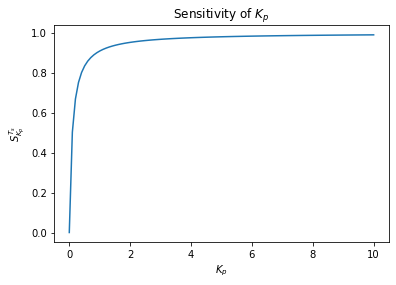

In [91]:
Kp = np.linspace(0, 10, 100)
plt.figure(3)
STs = -(10*Kp) / (10*Kp + 1)
plt.plot(Kp, abs(STs))
plt.xlabel("$K_p$")
plt.ylabel("$S^{T_s}_{K_p}$")
plt.title("Sensitivity of $K_p$")

(-1.0, 10.0)

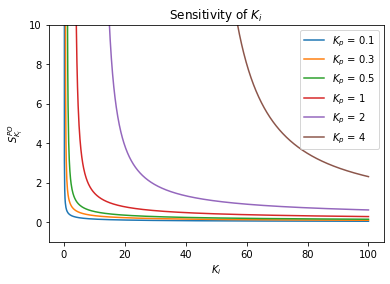

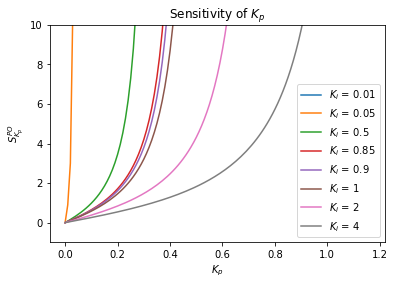

In [92]:
Ki = np.linspace(0, 100, 1000)
plt.figure(1)
for Kp in [0.1, 0.3, 0.5, 1, 2, 4]:
  SKi = 20 * np.pi * Ki**(3/2) * np.sqrt((1/Ki) * (40 * Ki - (10 * Kp + 1)**2)) * (10 * Kp + 1) / (40 * Ki - (10 * Kp + 1)**2)**2
  plt.plot(Ki, abs(SKi), label='$K_p$ = ' + str(Kp))
plt.legend()
plt.xlabel("$K_i$")
plt.ylabel("$S^{PO}_{K_i}$")
plt.title("Sensitivity of $K_i$")
plt.ylim(-1, 10)

Kp = np.linspace(0, 10, 1000)
plt.figure(2)
for Ki in [0.01, 0.05, 0.5, 0.85, 0.9, 1, 2, 4]:
  SKp = (-400 * np.pi * Ki**(3/2) * Kp) * np.sqrt((1/Ki) * (40 * Ki - (10 * Kp + 1)**2)) / ((40 * Ki - (10 * Kp + 1)**2))**2
  plt.plot(Kp, abs(SKp), label='$K_i$ = ' + str(Ki))
plt.legend()
plt.xlabel("$K_p$")
plt.ylabel("$S^{PO}_{K_p}$")
plt.title("Sensitivity of $K_p$")
plt.ylim(-1, 10)